In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline

In [2]:
ticker_symbol = 'BTC-USD'

# Fetch Bitcoin data from Yahoo Finance
df = yf.download(ticker_symbol, start='2015-01-01', end='2024-12-31')

df=df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD


In [3]:
df.shape

(0, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   (Date, )              0 non-null      datetime64[ns]
 1   (Adj Close, BTC-USD)  0 non-null      float64       
 2   (Close, BTC-USD)      0 non-null      float64       
 3   (High, BTC-USD)       0 non-null      float64       
 4   (Low, BTC-USD)        0 non-null      float64       
 5   (Open, BTC-USD)       0 non-null      float64       
 6   (Volume, BTC-USD)     0 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 132.0 bytes


In [5]:
df.describe()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaT,NaN,NaN,NaN,NaN,NaN,NaN
min,NaT,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaT,NaN,NaN,NaN,NaN,NaN,NaN
max,NaT,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD


In [7]:
# Initialize a flag to track if all values are the same
all_same = True

# Check if the 'Close' and 'Adj Close' values are the same for each row
for i in range(len(df)):
    if df['Close'][i] != df['Adj Close'][i]:
        all_same = False
        break

# Drop 'Adj Close' if all values are the same
if all_same:
    df = df.drop(columns='Adj Close')

# Display the updated DataFrame
df.head()

C:\Users\SIAM\AppData\Local\Temp\ipykernel_12012\1568010391.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns='Adj Close')


Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD


c:\Users\SIAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\SIAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


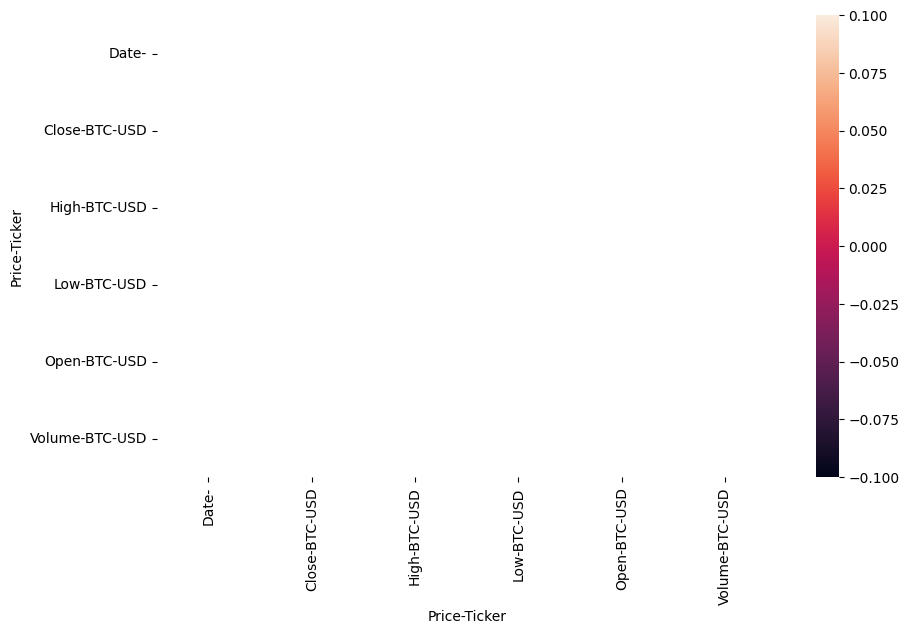

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume,Month,Day,Year
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,


In [11]:
df['Year'].unique()

array([], dtype=int32)

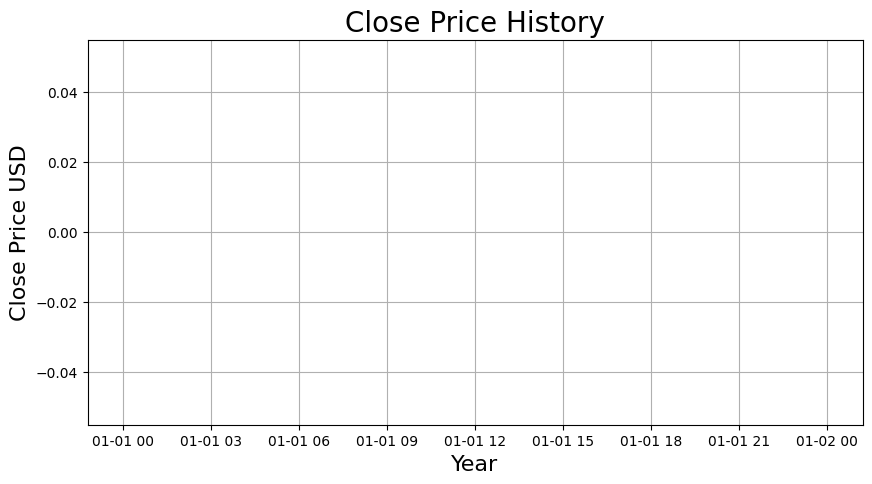

In [12]:
#plotting the data
plt.figure(figsize=(10,5))
plt.title('Close Price History',fontsize=20)
plt.plot(df['Date'],df['Close'], color='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Close Price USD', fontsize = 16)
plt.grid(True)
plt.show()

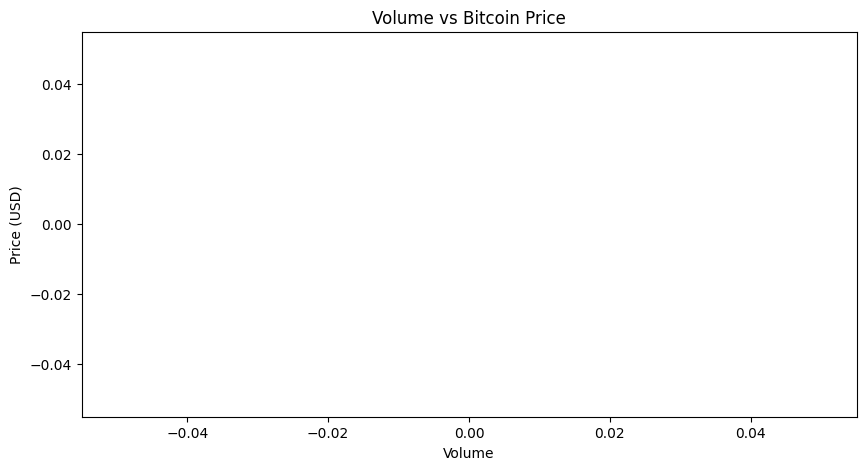

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='g')
plt.title('Volume vs Bitcoin Price')
plt.xlabel('Volume')
plt.ylabel('Price (USD)')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

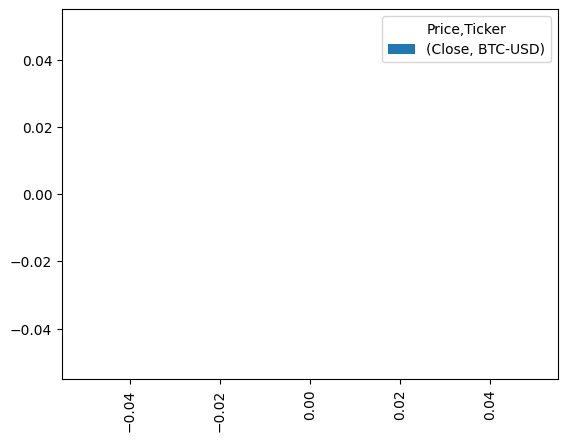

In [14]:
monthly_mean = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_mean.plot(kind='bar')
plt.title('Average Bitcoin Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.show()

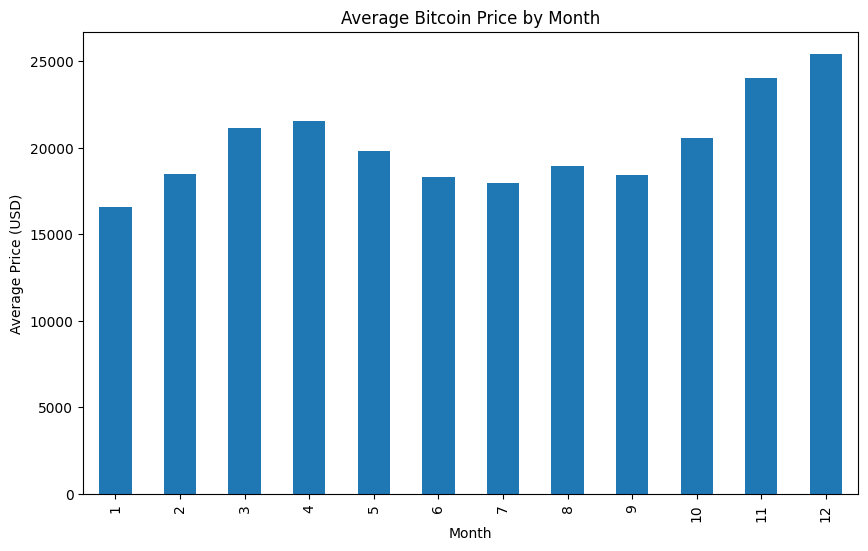

In [ ]:

# Group by month to check seasonality
monthly_mean = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_mean.plot(kind='bar')
plt.title('Average Bitcoin Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.show()


In [ ]:
gb_year=df.groupby("Year")


df_2015=gb_year.get_group(2015)
df_2016=gb_year.get_group(2016)
df_2017=gb_year.get_group(2017)
df_2018=gb_year.get_group(2018)
df_2019=gb_year.get_group(2019)
df_2020=gb_year.get_group(2020)
df_2021=gb_year.get_group(2021)
df_2022=gb_year.get_group(2022)
df_2023=gb_year.get_group(2023)
df_2024=gb_year.get_group(2024)

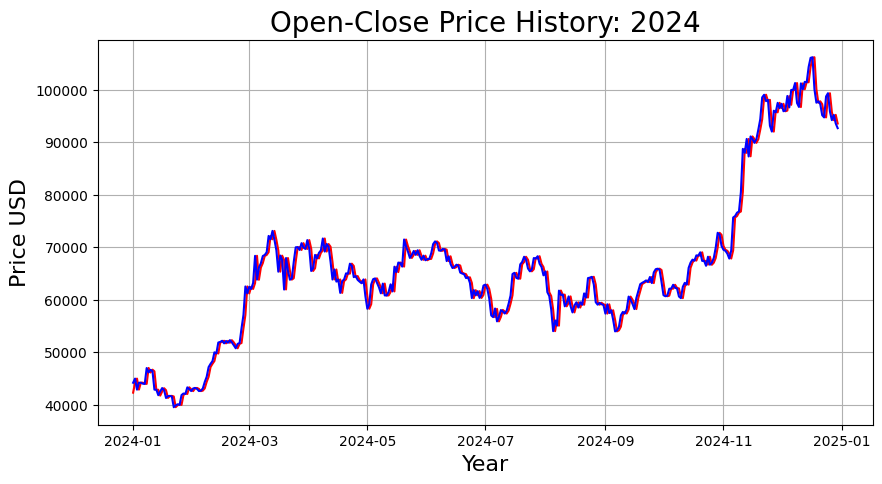

In [ ]:
#plotting the data
plt.figure(figsize=(10,5))
plt.title('Open-Close Price History: 2024',fontsize=20)
plt.plot(df_2024['Date'],df_2024['Open'], color='r')
plt.plot(df_2024['Date'],df_2024['Close'], color='b')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price USD', fontsize = 16)
plt.grid(True)
plt.show()

In [ ]:
# Group the data by 'Year' and 'Month'
monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().unstack(level=0)
monthly_avg

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Month,,,,,,,,,,
1,248.782547,410.844485,914.916159,13085.558090,3701.554963,8389.270476,34761.649950,41114.422379,20250.717490,42919.612399
2,234.153645,404.408274,1062.533672,9472.001151,3711.907261,9630.722185,46306.798968,40763.474051,23304.539202,49875.174300
3,269.042259,416.525774,1129.365228,9040.557097,3976.069100,6871.016113,54998.008695,41966.237525,25116.900895,67702.439264
4,235.491534,434.339398,1206.641007,8033.596631,5178.469434,7224.477327,57206.720052,41435.319661,28857.574544,65882.380599
5,236.997001,461.954415,1895.383529,8450.997732,7309.694131,9263.151745,46443.286668,31706.105217,27499.307145,65266.317288
6,238.081766,642.869061,2636.204346,6793.507666,9415.900179,9489.227214,35845.154687,24383.685482,27763.198437,65899.465755
7,279.563740,661.356103,2519.418386,7146.349987,10669.336158,9589.899729,34444.973790,21539.253843,30057.469947,62804.542087
8,250.733805,579.585197,3880.989998,6700.129946,10643.248362,11652.394185,45709.022681,22366.266318,27852.792843,59921.197581
9,233.595533,605.848633,4064.836312,6610.675033,9814.067871,10660.276855,45939.771484,19804.779232,26306.136393,60358.515885


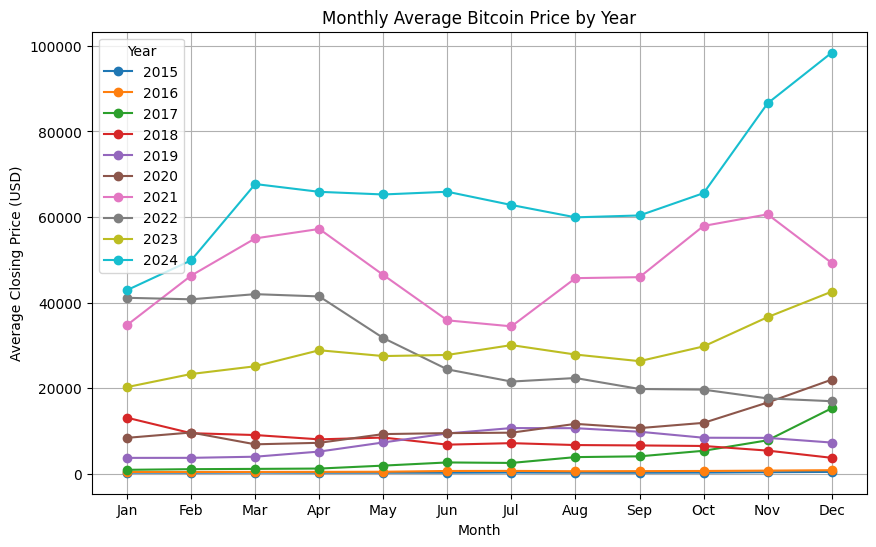

In [ ]:
# Plot the monthly average closing prices for each year
plt.figure(figsize=(10, 6))

for year in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[year], label=f'{year}', marker='o')

plt.title('Monthly Average Bitcoin Price by Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()
 

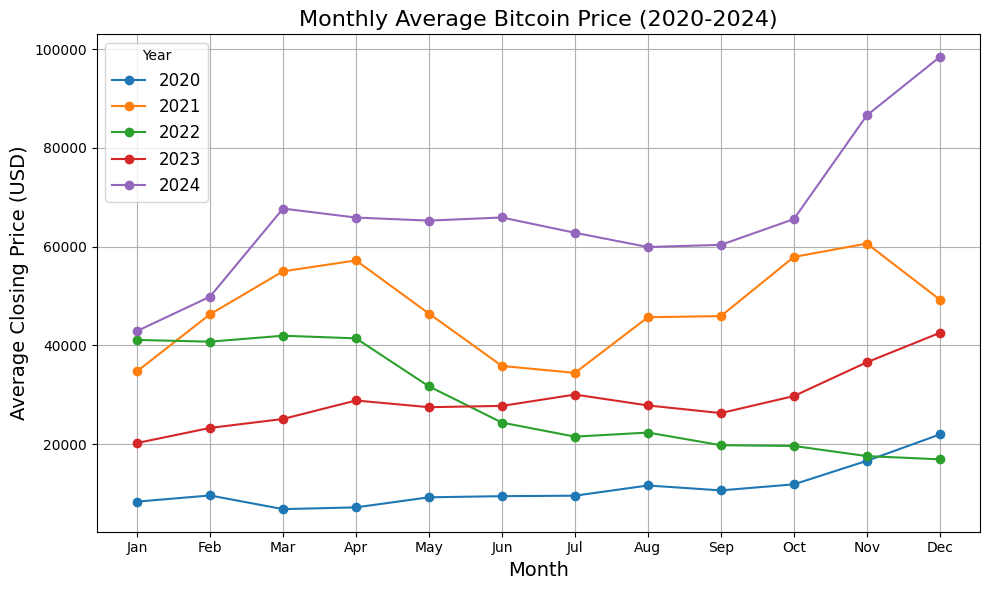

In [ ]:
# Filter the columns for years 2020 to 2024
years_to_plot = [2020, 2021, 2022, 2023, 2024]

# Plot the monthly average closing prices for each of the selected years
plt.figure(figsize=(10, 6))

for year in years_to_plot:
    if year in monthly_avg.columns:  # Ensure the year is present in the columns
        plt.plot(monthly_avg.index, monthly_avg[year], label=f'{year}', marker='o')

# Customize the plot
plt.title('Monthly Average Bitcoin Price (2020-2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Closing Price (USD)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



Top 3 months for 2020:
Month: 12, Average Price: 21983.14 USD
Month: 11, Average Price: 16645.76 USD
Month: 10, Average Price: 11886.98 USD

Top 3 months for 2021:
Month: 11, Average Price: 60621.49 USD
Month: 10, Average Price: 57911.97 USD
Month: 4, Average Price: 57206.72 USD

Top 3 months for 2022:
Month: 3, Average Price: 41966.24 USD
Month: 4, Average Price: 41435.32 USD
Month: 1, Average Price: 41114.42 USD

Top 3 months for 2023:
Month: 12, Average Price: 42546.89 USD
Month: 11, Average Price: 36596.16 USD
Month: 7, Average Price: 30057.47 USD

Top 3 months for 2024:
Month: 12, Average Price: 98393.07 USD
Month: 11, Average Price: 86570.71 USD
Month: 3, Average Price: 67702.44 USD


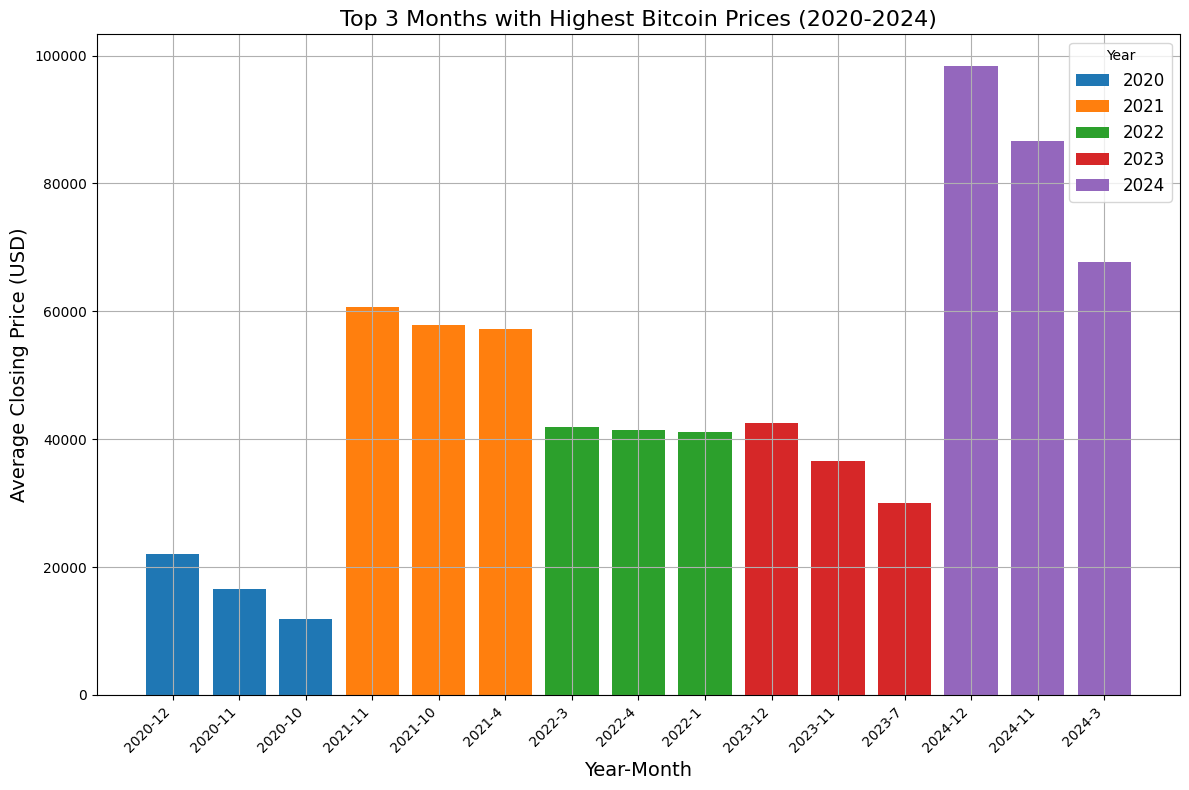

In [ ]:
# Dictionary to store top 3 months for each year
top_months_per_year = {}

# Filter the columns for years 2020 to 2024
years_to_analyze = [2020, 2021, 2022, 2023, 2024]

for year in years_to_analyze:
    if year in monthly_avg.columns:  # Check if year is present in the DataFrame
        
        # Get the data for the current year and sort it by price in descending order
        year_data = monthly_avg[year].sort_values(ascending=False)
        
        # Extract the top 3 months
        top_3_months = year_data.head(3)
        
        # Store the results in the dictionary
        top_months_per_year[year] = top_3_months

# Display the top 3 months for each year
for year, top_months in top_months_per_year.items():
    print(f"\nTop 3 months for {year}:")
    for month, price in top_months.items():
        print(f"Month: {month}, Average Price: {price:.2f} USD")


# Plotting the data
plt.figure(figsize=(12, 8))

for year, top_months in top_months_per_year.items():
    # Plot each year’s top 3 months as a bar chart
    plt.bar([f"{year}-{month}" for month in top_months.index], top_months.values, label=f'{year}')

# Customize the plot
plt.title('Top 3 Months with Highest Bitcoin Prices (2020-2024)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Closing Price (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



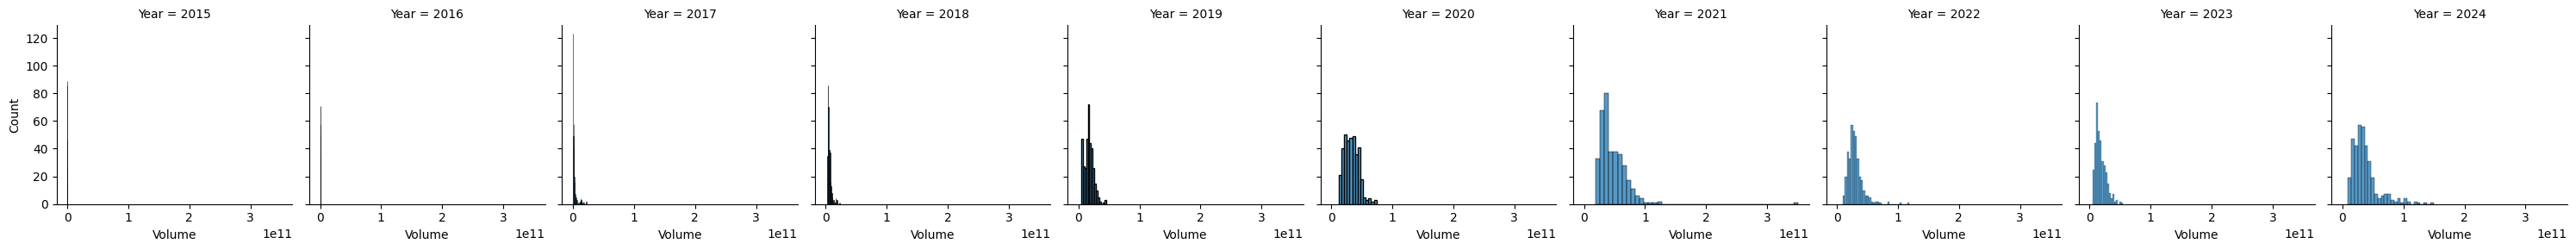

In [ ]:
g=sns.FacetGrid(data=df, col="Year")
g.map(sns.histplot, "Volume")

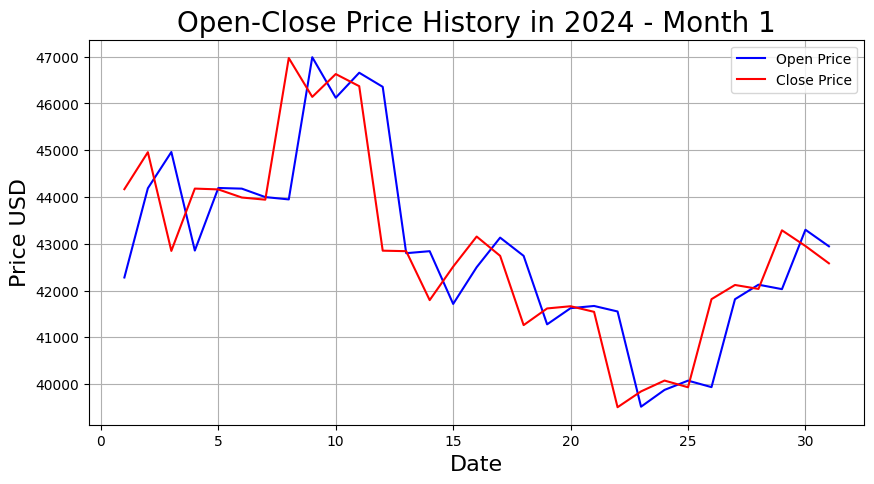

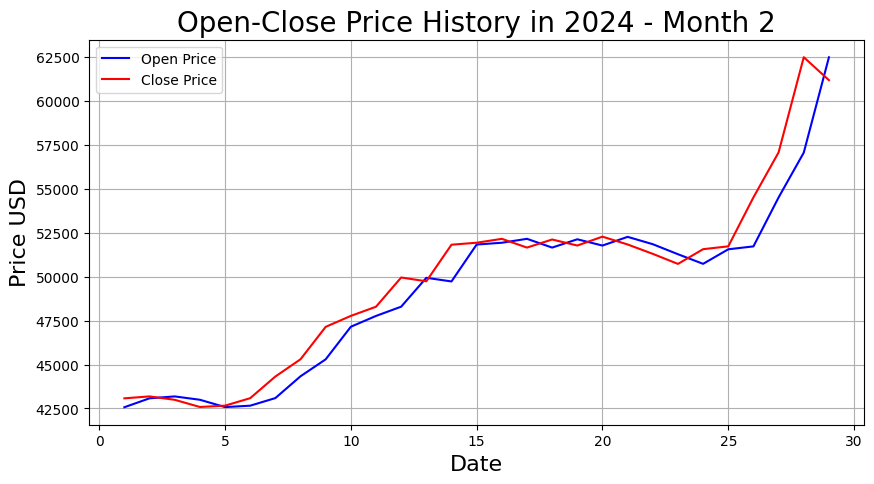

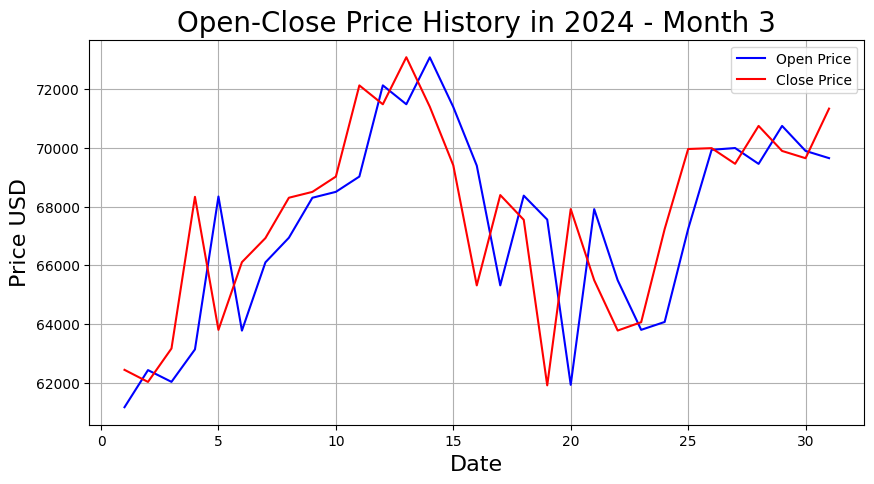

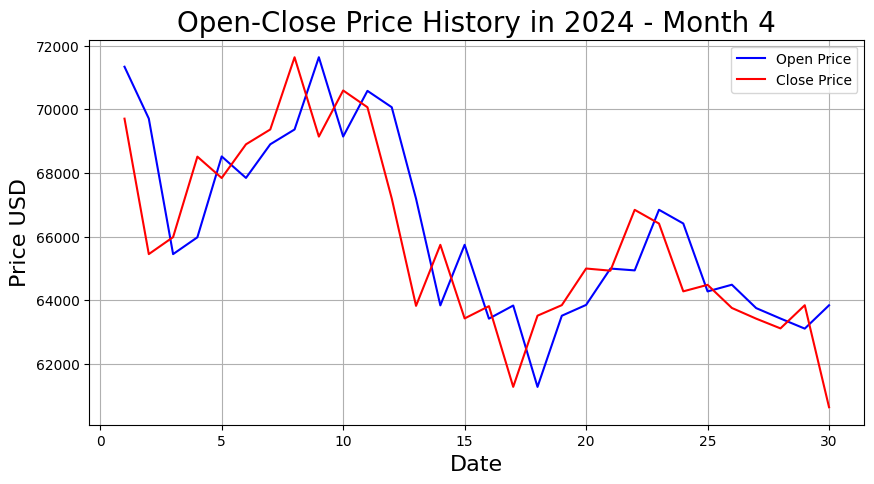

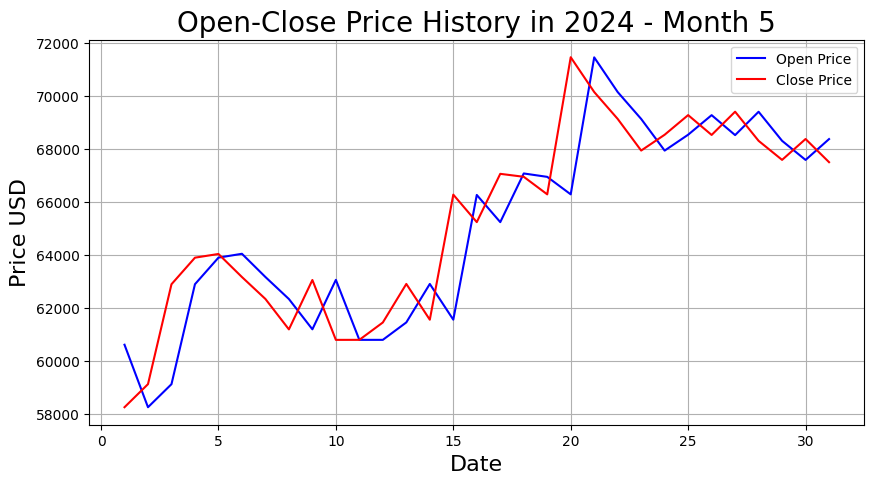

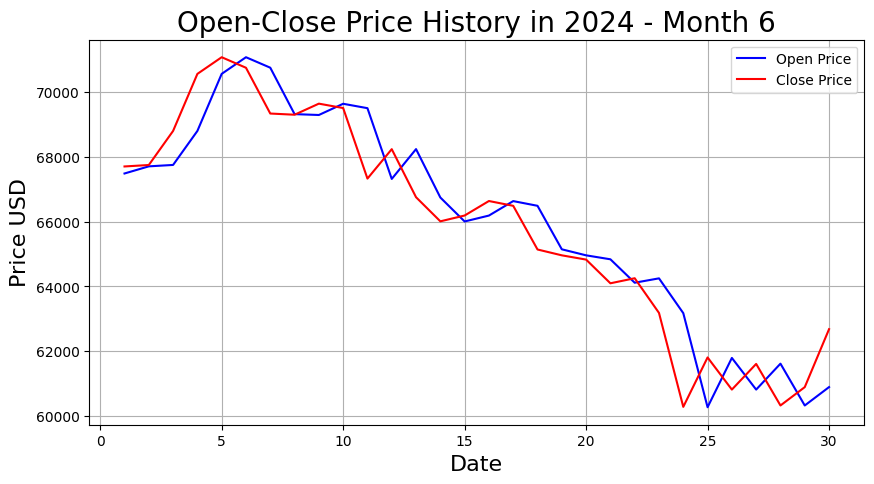

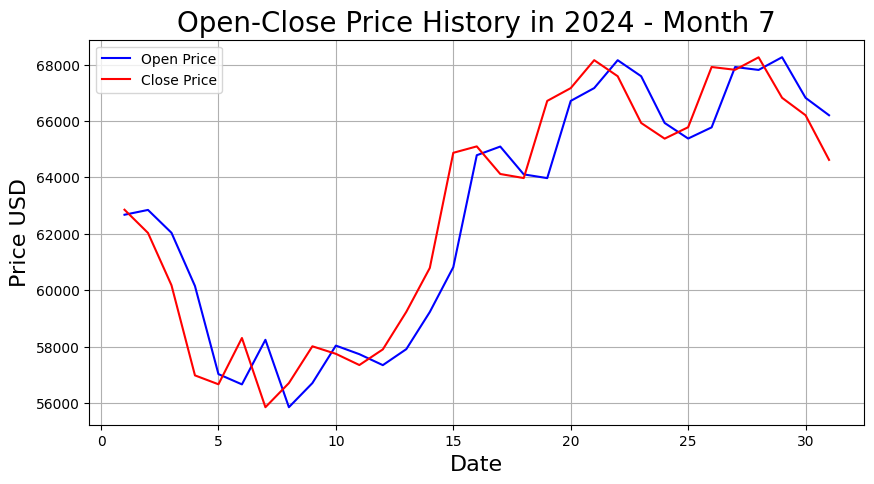

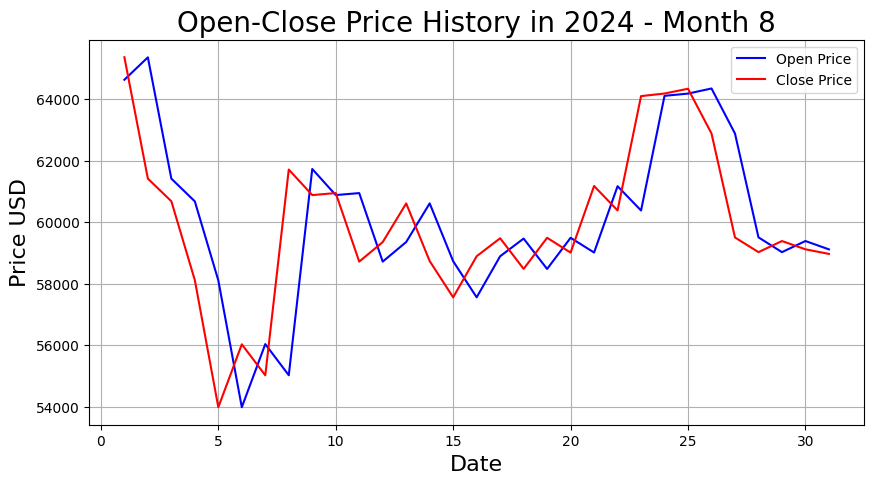

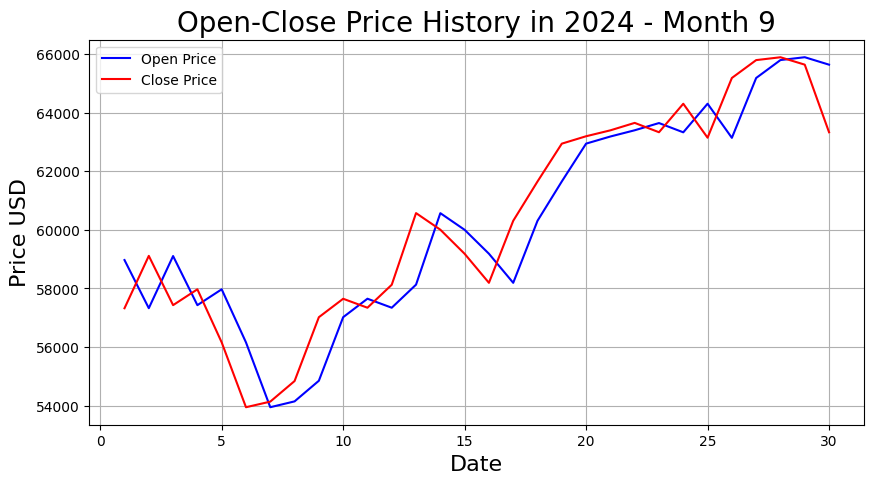

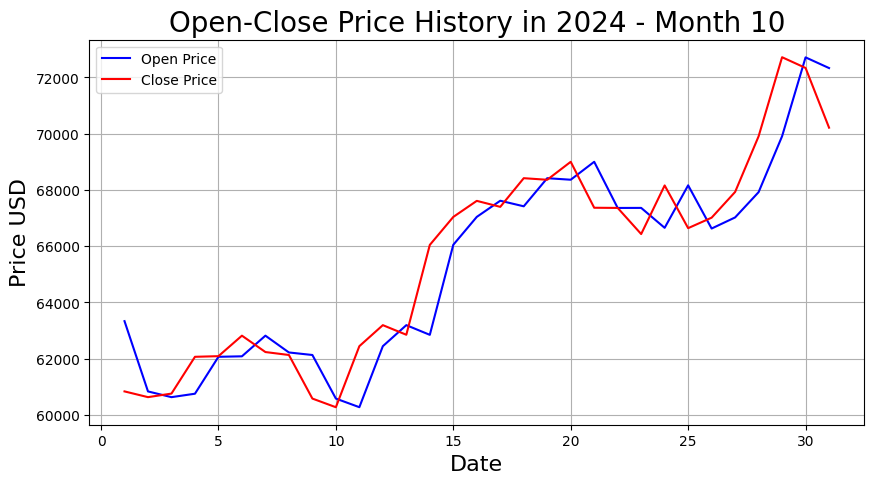

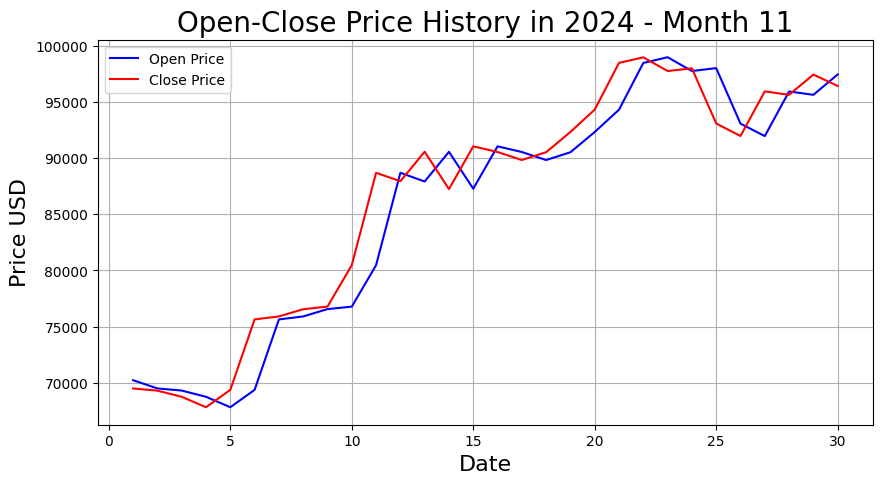

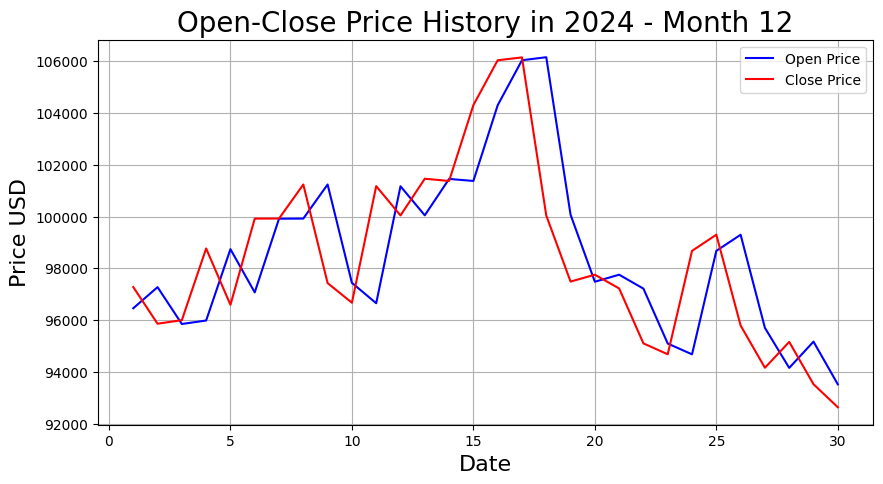

In [ ]:
# List of months (1 to 12 for Jan to Dec)
months = range(1, 13)

# Loop through each month and create a plot for Open and Close prices
for month in months:
    # Filter the data for the current month in 2024
    df_month = df_2024[df_2024['Date'].dt.month == month]
    
    # Check if the data for that month exists (avoid empty plots)
    if not df_month.empty:
        # Plot for the month
        plt.figure(figsize=(10, 5))
        plt.title(f'Open-Close Price History in 2024 - Month {month}', fontsize=20)
        
        # Plot Open Prices in blue
        plt.plot(df_month['Day'], df_month['Open'], color='b', label='Open Price')
        
        # Plot Close Prices in red
        plt.plot(df_month['Day'], df_month['Close'], color='r', label='Close Price')
        
        # Customize the plot
        plt.xlabel('Date', fontsize=16)
        plt.ylabel('Price USD', fontsize=16)
        plt.grid(True)
        
        # Add legend
        plt.legend()
        
        # Show the plot for the current month
        plt.show()



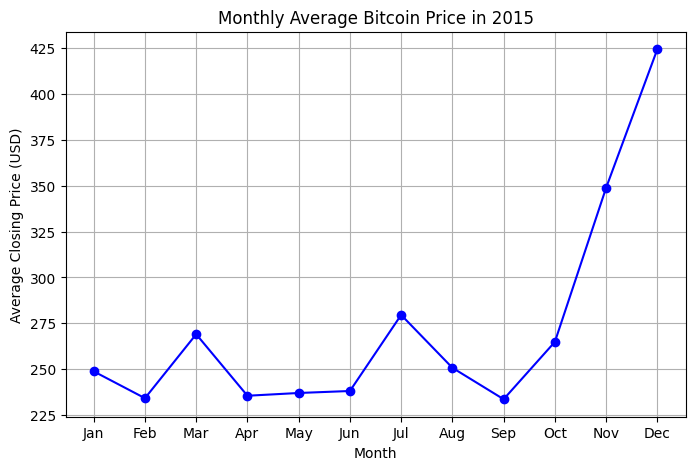

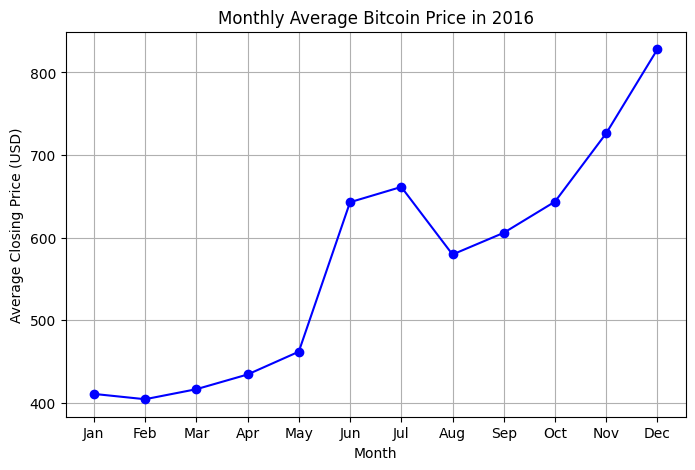

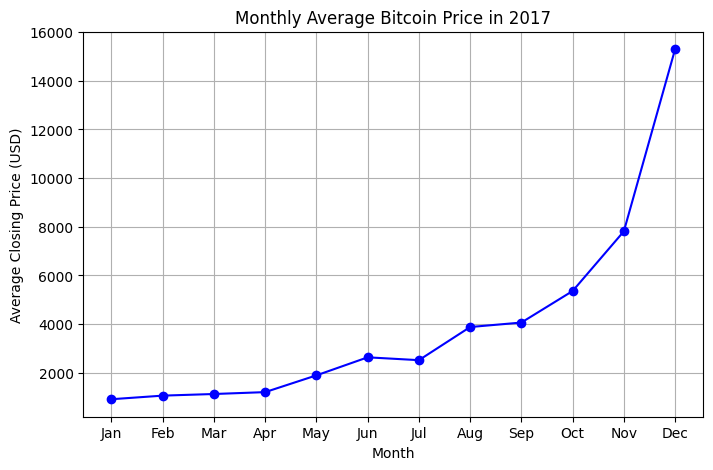

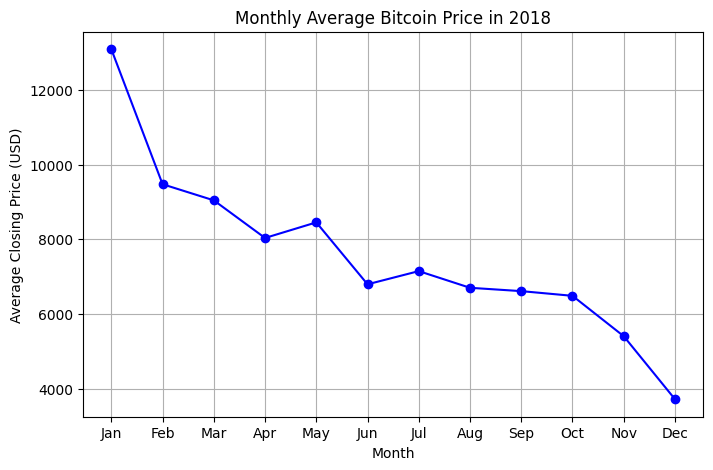

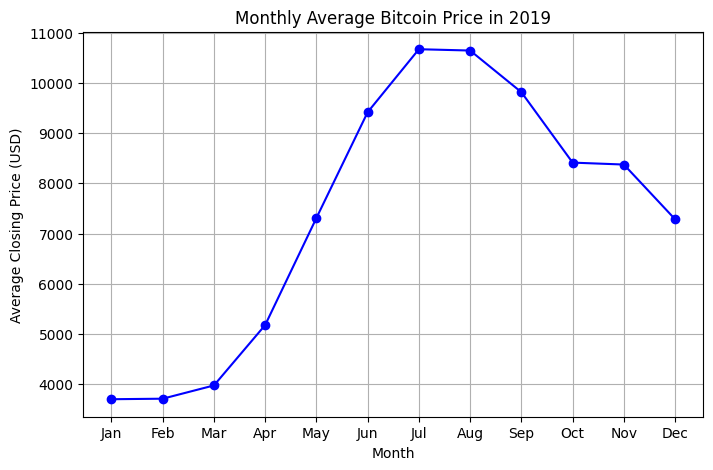

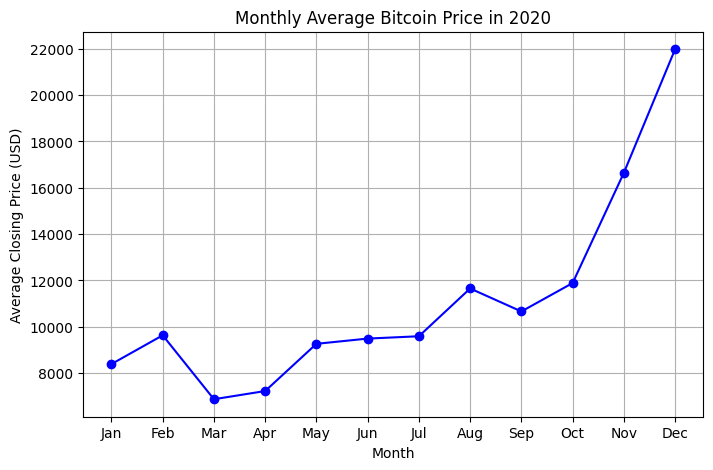

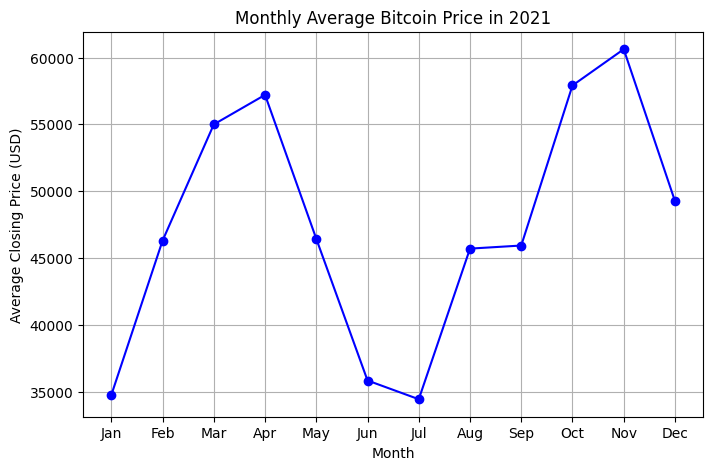

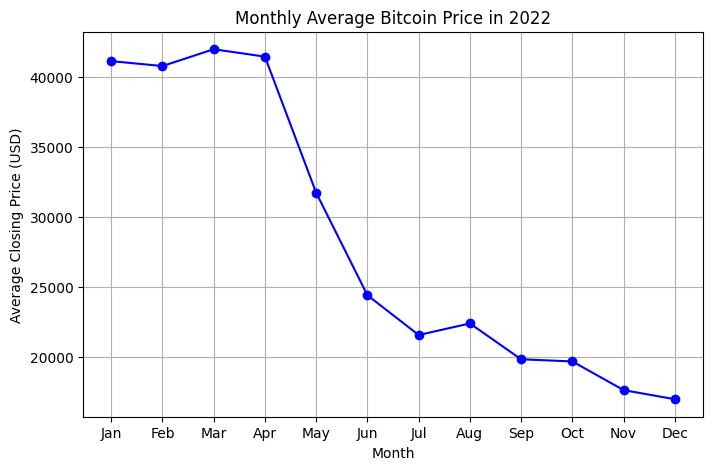

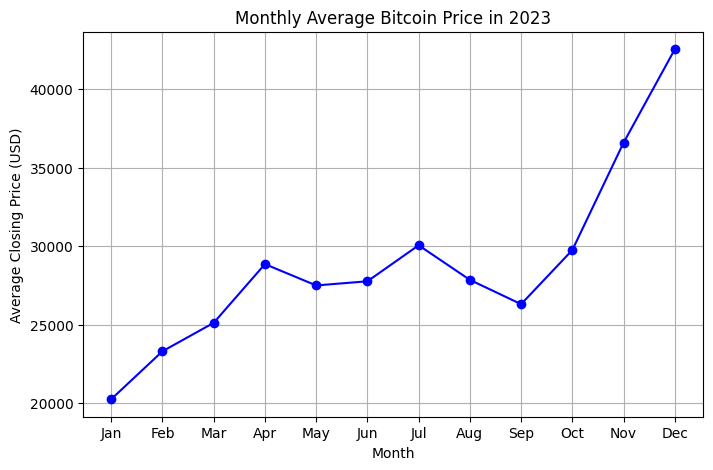

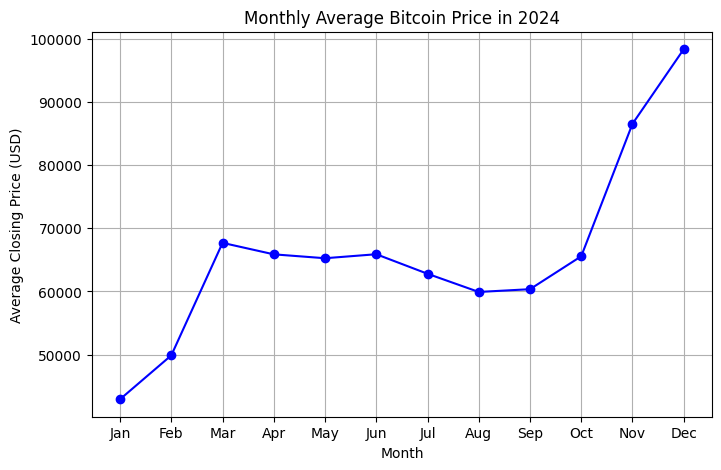

In [ ]:
# Get the list of years present in the dataset
years = range(2015, 2025)  # From 2015 to 2024

# Loop through each year and plot
for year in years:
    # Filter the monthly averages for the current year
    monthly_data = monthly_avg[year]
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(monthly_data.index, monthly_data.values, marker='o', color='b')
    
    # Customize the plot
    plt.title(f'Monthly Average Bitcoin Price in {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Closing Price (USD)')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    
    # Show the plot for the current year
    plt.show()


## Days of Market

In [ ]:
profit_days=df[df["Open"]<df['Close']].value_counts().sum()
loss_days=df[df["Open"]>df['Close']].value_counts().sum()
neutral_days=df[df["Open"]==df['Close']].value_counts().sum()

In [ ]:
profit_days=np.int64(profit_days)
loss_days=np.int64(loss_days)
neutral_days=np.int64(neutral_days)

print('Days of Profit  :{}\nDays of loss    :{}\nDays of Neutral :{}'.format(profit_days, loss_days,neutral_days))

Days of Profit  :1937
Days of loss    :1715
Days of Neutral :0


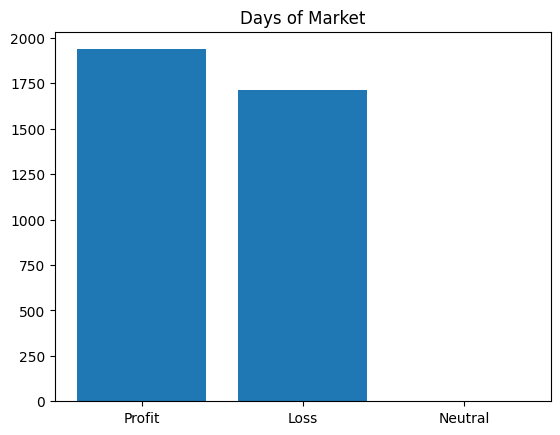

In [ ]:
plt.title('Days of Market',fontsize='12')
x=np.array(['Profit','Loss','Neutral'])
y=np.array([profit_days,loss_days,neutral_days])
plt.bar(x,y)
plt.show()

In [ ]:
# Create a column for daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Create rolling averages (7-day and 25-day moving averages)
df['7-day-MA'] = df['Close'].rolling(window=7).mean()
df['25-day-MA'] = df['Close'].rolling(window=25).mean()
# Calculate 30-day volatility
df['30-day-Volatility'] = df['Daily_Return'].rolling(window=30).std()
# Calculate 1-day volatility (standard deviation of daily returns)
#df['1-day Volatility'] = df['Daily_Return'].rolling(window=2).std()


In [ ]:
df.head()


,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,30-day-Volatility
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,1,1,2015,NaN,NaN,NaN,NaN
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,1,2,2015,0.002492,NaN,NaN,NaN
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,1,3,2015,-0.107767,NaN,NaN,NaN
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,1,4,2015,-0.060079,NaN,NaN,NaN
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,1,5,2015,0.038907,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Month                 0
Day                   0
Year                  0
Daily_Return          1
7-day-MA              6
25-day-MA            24
30-day-Volatility    30
dtype: int64

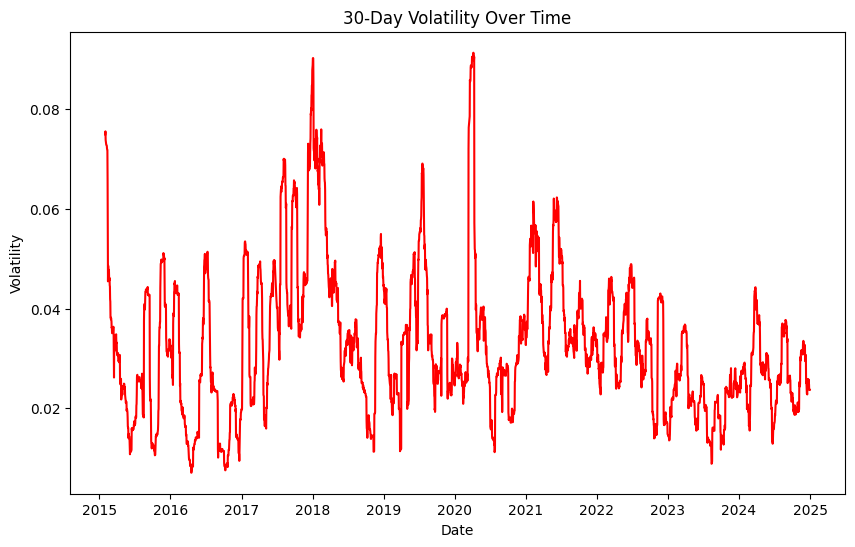

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['30-day-Volatility'], color='r')
plt.title('30-Day Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


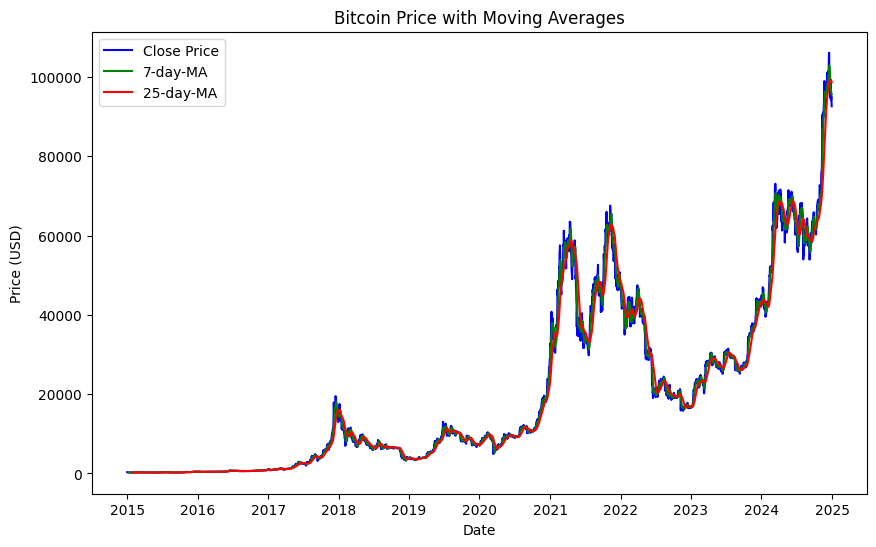

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['7-day-MA'], label='7-day-MA', color='g')
plt.plot(df['Date'], df['25-day-MA'], label='25-day-MA', color='r')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
# Save to CSV
df.to_csv('bitcoin.csv', index=False)  

print("CSV file has been saved as 'output.csv'")

CSV file has been saved as 'output.csv'
